In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif


ModuleNotFoundError: No module named 'skfeature'

In [82]:
pip install skfeature-chappers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 1.0 MB/s eta 0:00:00eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [83]:
from skfeature.function.similarity_based import fisher_score

In [ ]:
Chi square Test

Two Categorical variable


Null Hypothesis Two variable are independent
Alternate hypothesis Two variable are dependent

p-val > 0.05 Two variable are independent
p-val < 0.05 two variable are dependent


In [2]:
df_raw = sns.load_dataset('titanic')

In [3]:
df_raw

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df = df_raw[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked']]

In [5]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [6]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
df.dropna(inplace = True)

/Users/thispc/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [11]:
X = df.drop('survived',axis=1)

In [12]:
X

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
889,1,male,26.0,0,0,30.0000,C


In [41]:
y = df['survived']

In [14]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 712, dtype: int64

In [15]:
X_encoded_df = pd.get_dummies(X)

In [16]:
X_encoded_df

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,1,0,0,1,0
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [17]:
le = LabelEncoder()

In [18]:
y_encode = le.fit_transform(y)

In [19]:
y_encode_df  =  pd.DataFrame(y_encode,columns=['y_encode'])

In [20]:
y_encode_df

,y_encode
0,0
1,1
2,1
3,1
4,0
...,...
707,0
708,0
709,1
710,1


In [23]:
chi_score,p_value = chi2(X_encoded_df,y_encode_df)

In [54]:
p_value

array([1.06989104e-07, 4.85648266e-09, 5.91060600e-01, 9.70247379e-04,
       0.00000000e+00, 3.16101283e-30, 5.70252797e-18, 2.35218267e-06,
       2.00323824e-01, 4.56307860e-02])

In [53]:
np.around(p_value,3)

array([0.   , 0.   , 0.591, 0.001, 0.   , 0.   , 0.   , 0.   , 0.2  ,
       0.046])

In [57]:
chi_calulated = pd.DataFrame({'chi-score':chi_score,'pvalue' :np.around(p_value,5)},index=X_encoded_df.columns)

In [58]:
chi_calulated

,chi-score,pvalue
pclass,28.243213,0.00000
age,34.246098,0.00000
sibsp,0.288691,0.59106
parch,10.883500,0.00097
fare,4081.679420,0.00000
sex_female,130.515207,0.00000
sex_male,74.621277,0.00000
embarked_C,22.283507,0.00000
embarked_Q,1.640012,0.20032
embarked_S,3.995172,0.04563


In [ ]:
if p-value is greater than 0.05 than accept null hypothesis 

by default null hypothesis is considered as there is no relation between


# example so  sibsp		0.59106 greater than 0.05 so accept null hypothesis ,so it is sibsp is independent
# embarked_Q also independent
# others are dependent


In [62]:
0.59 > 0.05

True

In [63]:
0.20032> 0.05

True

In [64]:
0.04563 > 0.05

False

In [ ]:
If your chi-square calculated value is greater than the chi-square critical value, 
then you reject your null hypothesis. If your chi-square calculated value is less than the chi-square 
critical value, then you "fail to reject" your null hypothesis. 


# 1. Mutual information gain 

In [104]:
array = mutual_info_classif(X_encoded_df,y_encode_df)

/Users/thispc/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
series_ = pd.Series(array)

In [79]:
series_.index = X_encoded_df.columns

<Axes: >

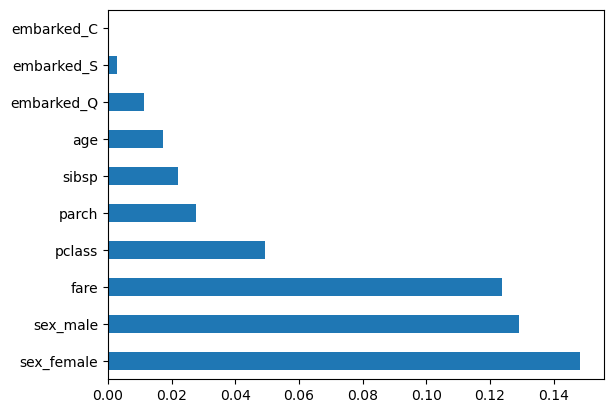

In [80]:
series_.sort_values(ascending=False).plot(kind='barh')

# Higher MI value = Strong relationship between feature and target = More important feature.
# Lower MI value = Weak or no relationship = Less important feature.

# 2. fisher Score 

# specific for  binary classification 

In [ ]:
# it is rank based 

In [94]:
array = fisher_score.fisher_score(X_encoded_df.values,y_encode)

In [96]:
fish_df = pd.Series(array)

In [99]:
fish_df.index = X_encoded_df.columns

<Axes: >

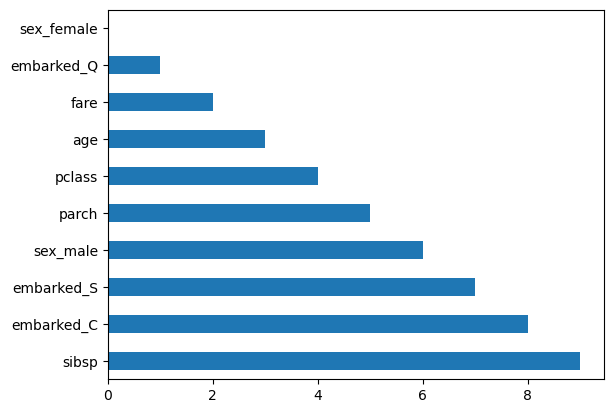

In [103]:
fish_df.sort_values(ascending=False).plot(kind='barh')

# Low rank = More important feature.
# High rank = Less important feature.

# 3. Correlation

In [ ]:
 correlation is for continous variable 

continous correlation --> positive/Negative corelation
    

<Axes: >

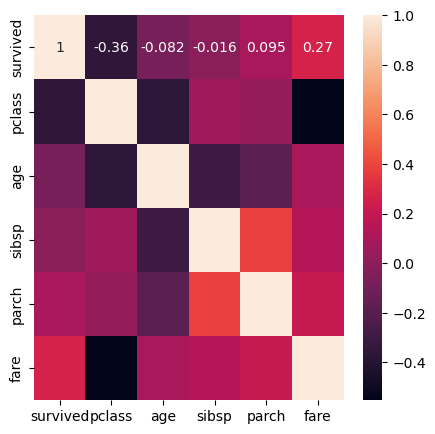

In [115]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)